In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-dataset/diabetes.csv


<a id="1"></a>
# <p style="background-color:#5c7a9c;font-family:newtimeroman;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Diabetes EDA</p>

## About the dataset:
This dataset contains 253680 cases, divided into two segments (diabetes and No-diabetes). 
Here i am using the third dataset of [this](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) , which is clean and inbalanced.

## Content:
1. Importing libraries and Reading Data.
2. Exploring the data.
3. Exploring with visualizations.
4. Preprocessing and feature selection.
5. Modeling

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib.colors import ListedColormap
from matplotlib import colors
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<a id="1"></a>
# <p style="background-color:#5b7b9b;font-family:newtimeroman;color:#FFE9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

In [4]:
print("Descriptive Analysis: ")
data.describe()

Descriptive Analysis: 


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


##### No Outliers detected!

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
for i in data.columns:
    print(f"Null values in {i} are {data[i].isna().sum()}")

Null values in Diabetes_binary are 0
Null values in HighBP are 0
Null values in HighChol are 0
Null values in CholCheck are 0
Null values in BMI are 0
Null values in Smoker are 0
Null values in Stroke are 0
Null values in HeartDiseaseorAttack are 0
Null values in PhysActivity are 0
Null values in Fruits are 0
Null values in Veggies are 0
Null values in HvyAlcoholConsump are 0
Null values in AnyHealthcare are 0
Null values in NoDocbcCost are 0
Null values in GenHlth are 0
Null values in MentHlth are 0
Null values in PhysHlth are 0
Null values in DiffWalk are 0
Null values in Sex are 0
Null values in Age are 0
Null values in Education are 0
Null values in Income are 0


In [7]:
print(f"Duplicates are {data.duplicated().sum()}")

Duplicates are 24206


In [8]:
two_unique_values = []
more_than_two_values = []

for col in data.columns:
    unique_vals = data[col].unique()
    num_unique_vals = len(unique_vals)
    
    if num_unique_vals == 2:
        #columns with exactly 2 unique values
        two_unique_values.append({
            "Column Name": col,
            "First Unique Value": unique_vals[0],
            "Second Unique Value": unique_vals[1]
        })
    elif num_unique_vals > 2:
        #columns with more than 2 unique values
        more_than_two_values.append({
            "Column Name": col,
            "Number of Unique Values": num_unique_vals
        })

df_two_unique = pd.DataFrame(two_unique_values)
df_more_than_two = pd.DataFrame(more_than_two_values)

print("DataFrame with columns having exactly 2 unique values:")
df_two_unique

DataFrame with columns having exactly 2 unique values:


,Column Name,First Unique Value,Second Unique Value
0,Diabetes_binary,0.0,1.0
1,HighBP,1.0,0.0
2,HighChol,1.0,0.0
3,CholCheck,1.0,0.0
4,Smoker,1.0,0.0
5,Stroke,0.0,1.0
6,HeartDiseaseorAttack,0.0,1.0
7,PhysActivity,0.0,1.0
8,Fruits,0.0,1.0
9,Veggies,1.0,0.0


In [9]:
print("\nDataFrame with columns having more than 2 unique values and their counts:")
df_more_than_two


DataFrame with columns having more than 2 unique values and their counts:


,Column Name,Number of Unique Values
0,BMI,84
1,GenHlth,5
2,MentHlth,31
3,PhysHlth,31
4,Age,13
5,Education,6
6,Income,8


<Axes: >

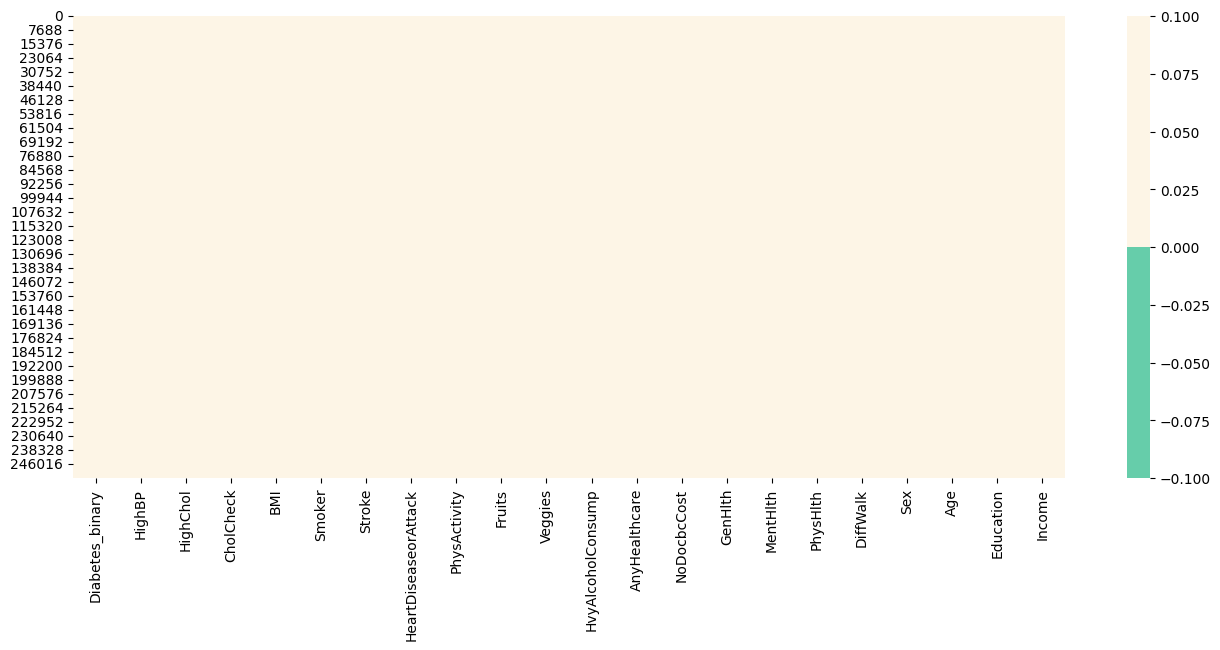

In [10]:
plt.figure(figsize=(16,6))

colours = ["mediumaquamarine", "oldlace"] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

In [11]:
data.drop_duplicates(inplace = True)
print(f"{data.duplicated().sum()} Duplicated values remaining.")

0 Duplicated values remaining.


<a id="1"></a>
# <p style="background-color:#5c7a9c;font-family:newtimeroman;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Visualization</p>

### Finding relationships between features!
* First discover the correlations between features.

<Axes: >

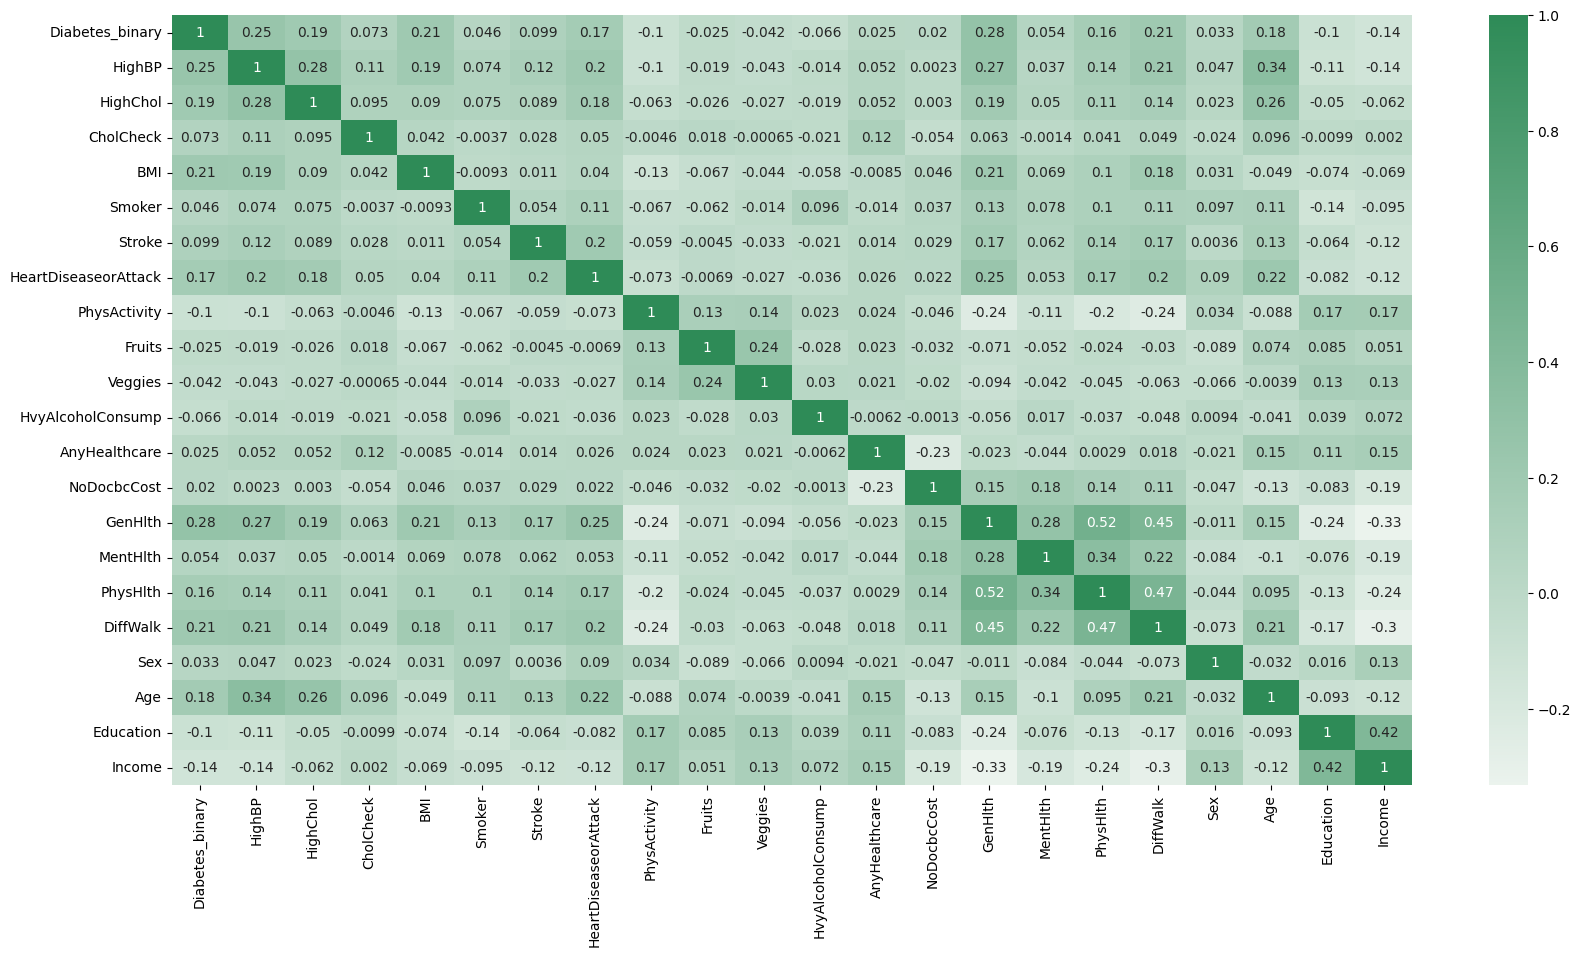

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap =(sns.light_palette("seagreen", as_cmap=True)) )

<br>    
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/WillyWill143/Diabetes-Analysis/refs/heads/main/Observations%20(1).png">
</p>

<br>    
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/WillyWill143/Diabetes-Analysis/refs/heads/main/Observations%20(2).png">
</p>

* There is also a funny correlation between people who eat veggies and drink alcohol, only 0.03 but still found it funny!

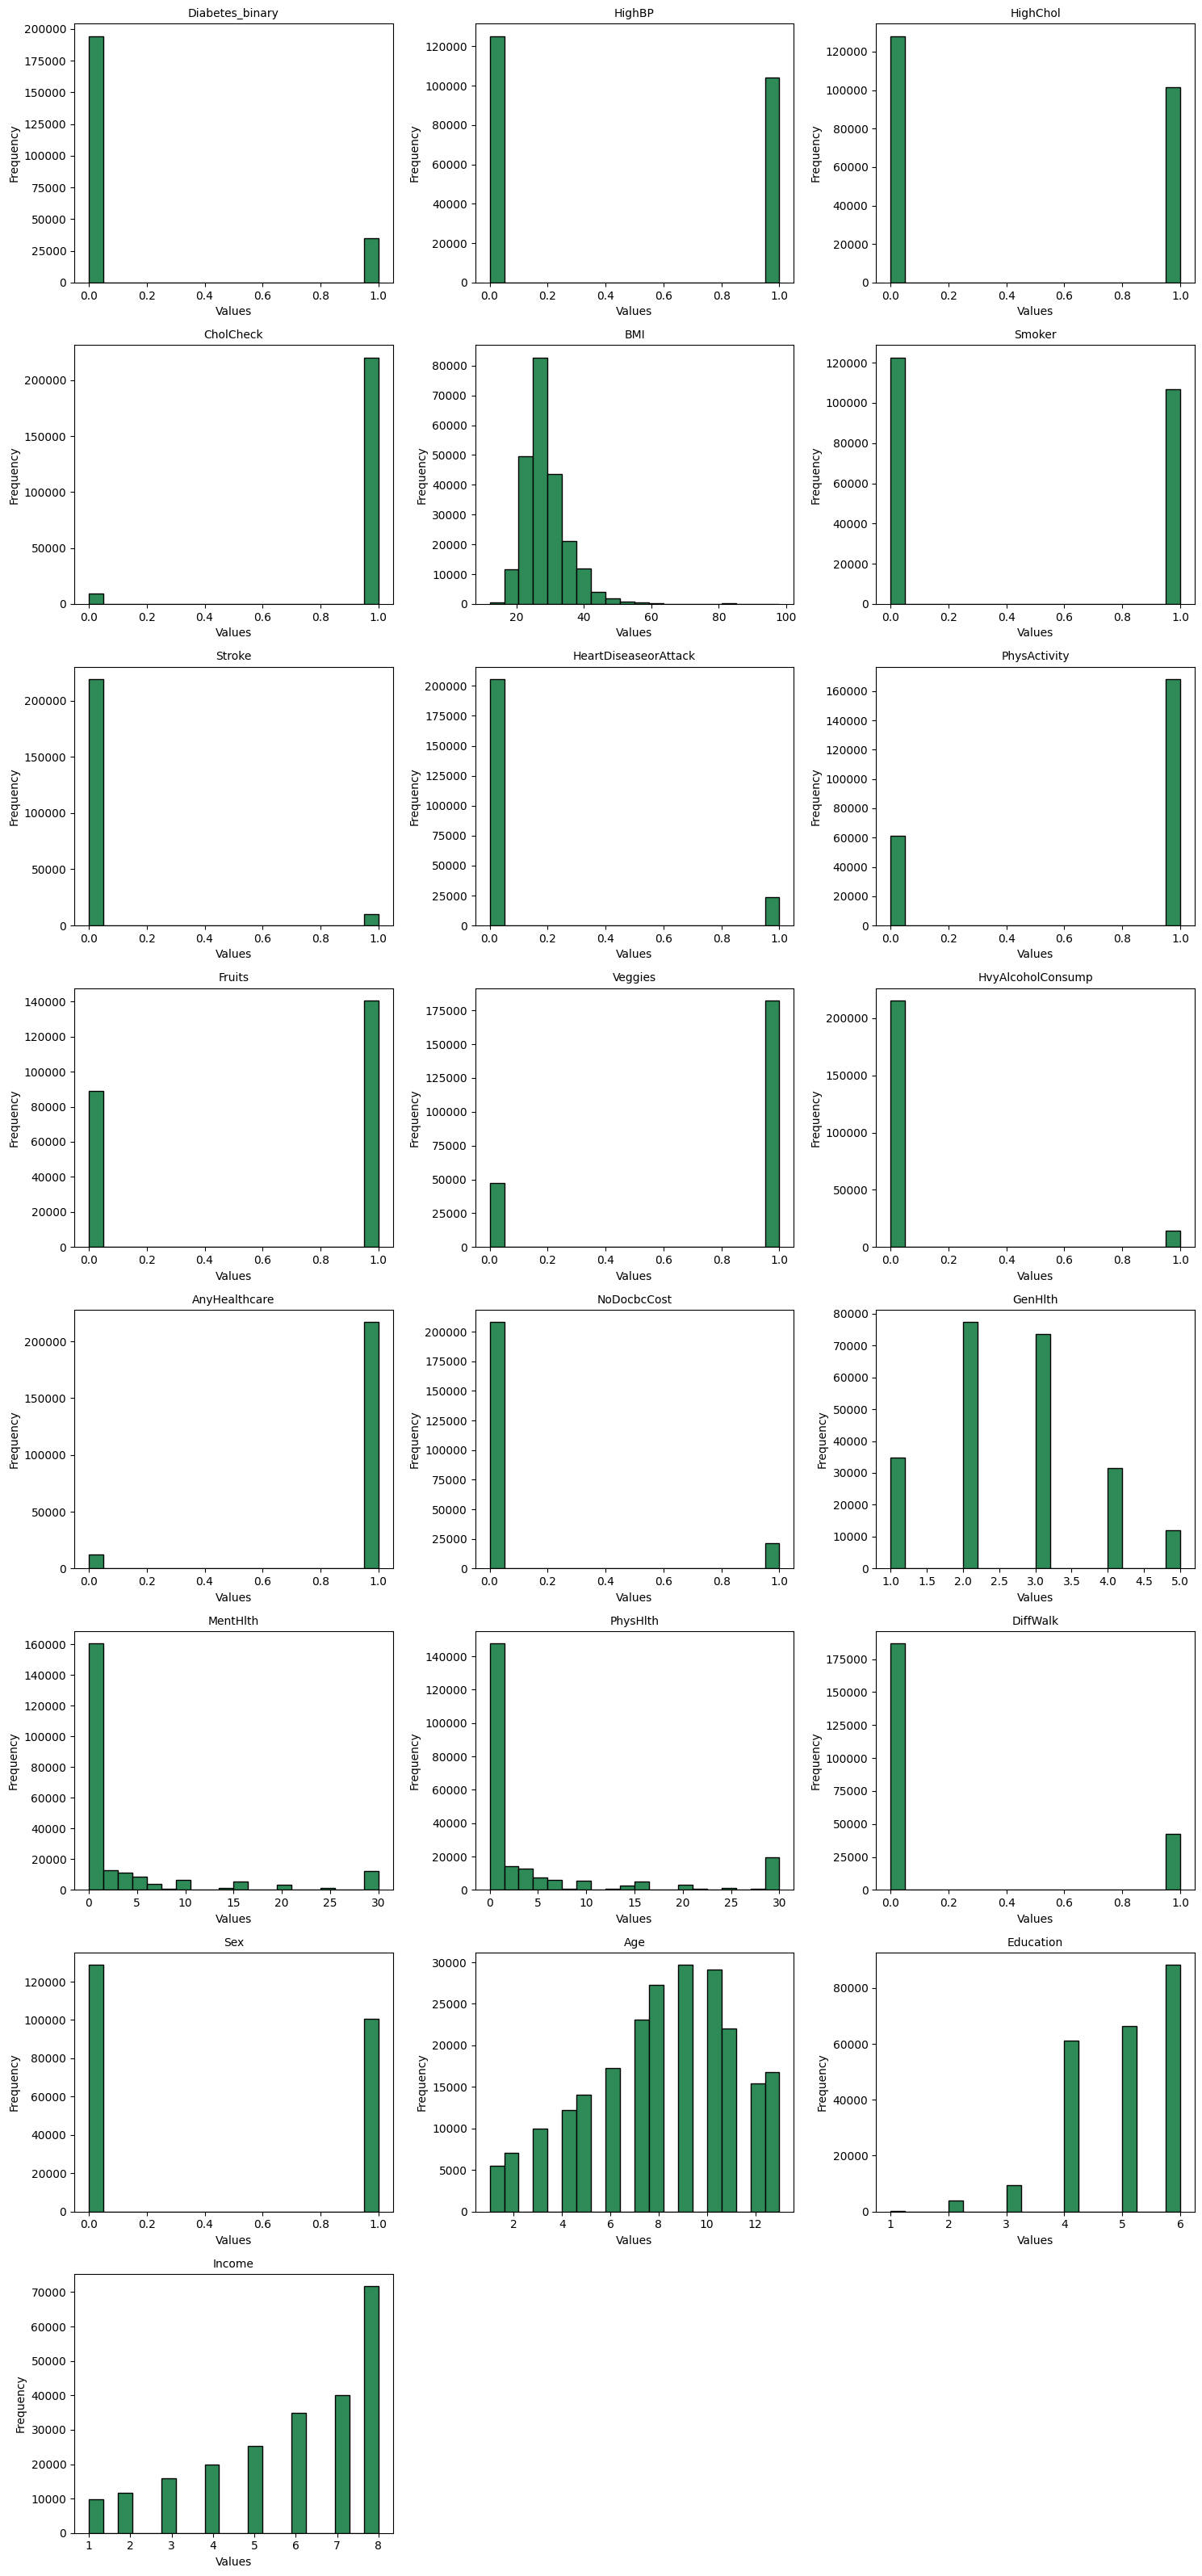

In [13]:
num_columns = len(data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))


axes = axes.flatten()

#histogram for column
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=20, color='seagreen', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

#Remove extra subplots if columns are fewer than grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Observations:
* Based on the distribution in DiffWalk, GenHlth, MentHlth, apparently our cases are relatively healthy.
* Even though half of them are smokers and a third don't do any physical activity.
* Most of our cases are well Educated and have a fairly distributed income (almost).

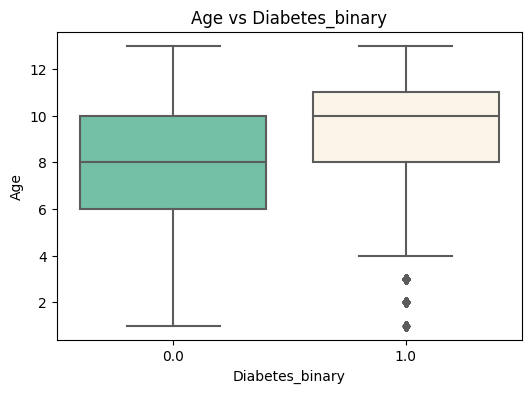

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Diabetes_binary", y= "Age", data=data, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Age vs Diabetes_binary')
plt.show()

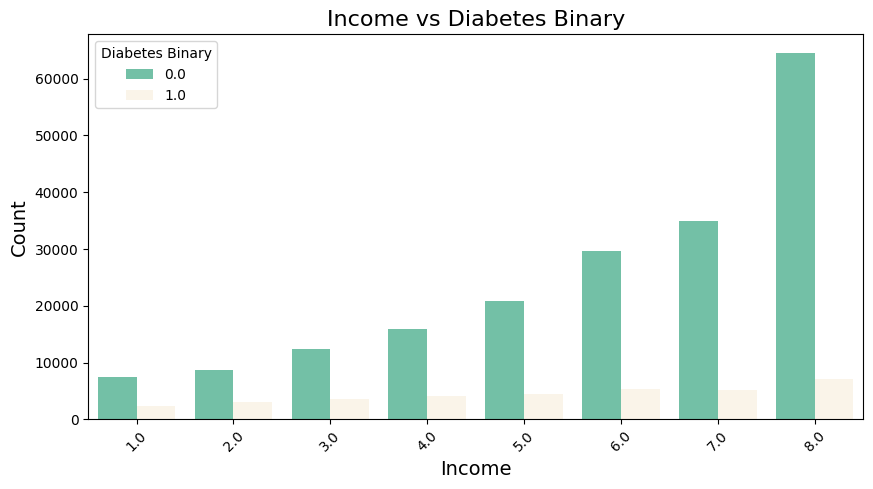

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Income', hue='Diabetes_binary', data=data, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Income vs Diabetes Binary', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

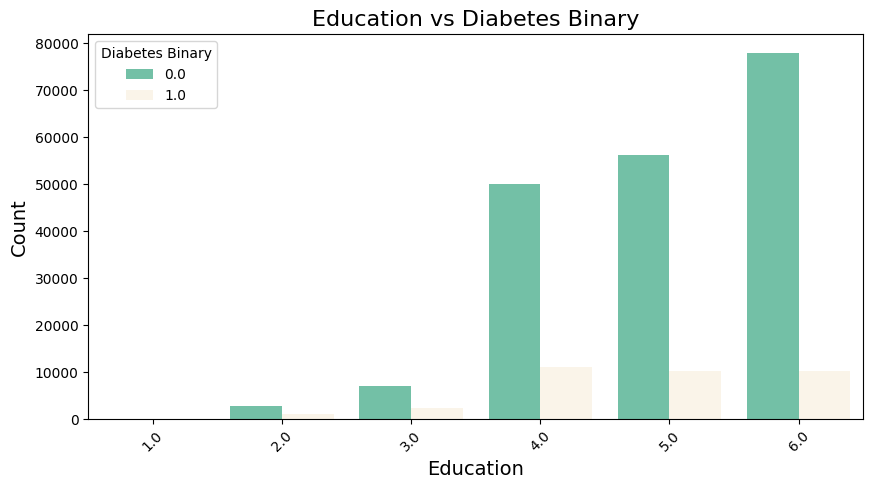

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x= "Education", hue="Diabetes_binary", data=data, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title("Education vs Diabetes Binary", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

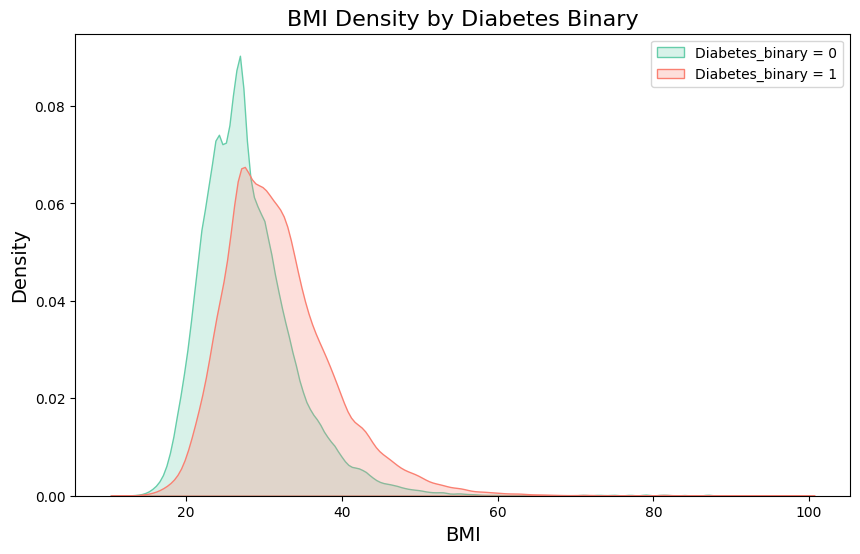

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Diabetes_binary'] == 0]['BMI'], label='Diabetes_binary = 0', color="mediumaquamarine", shade=True)
sns.kdeplot(data=data[data['Diabetes_binary'] == 1]['BMI'], label='Diabetes_binary = 1', color="salmon", shade=True)
plt.title('BMI Density by Diabetes Binary', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

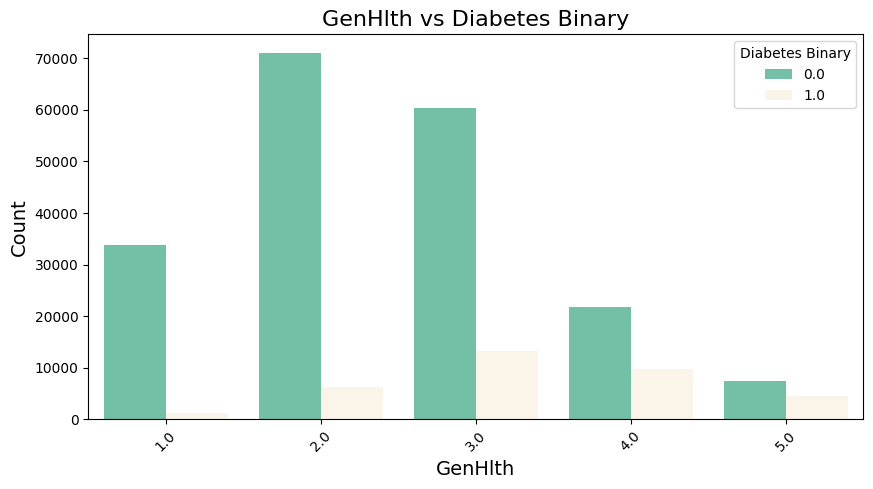

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x= "GenHlth", hue="Diabetes_binary", data=data, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title("GenHlth vs Diabetes Binary", fontsize=16)
plt.xlabel("GenHlth", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

### Insights and Observations:
* People that are 50 and above are the most prone to diabetes.
* Income and Education have nothing to do with being diabetec, but we can certainlt notice that the higher the income and the education level, the better health becomes.
* People with BMI between 22 and 40 are the most prone to diabetes.
* People with medium General health are the most diabetec?

<a id="1"></a>
# <p style="background-color:#5c7a9c;font-family:newtimeroman;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Preprocessing</p>

### Steps:

1. Feature Selection using Chi Squared.
2. Deleting irrelevant columns.
3. Splitting the Data.
4. Using Undersampling.
5. Scaling.

In [19]:
X = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"]

chi2_selector = SelectKBest(chi2, k="all")  
X_kbest = chi2_selector.fit_transform(X, y)


chi2_scores = chi2_selector.scores_

chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores
})

chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

chi2_results

,Feature,Chi2 Score
15,PhysHlth,97988.761672
3,BMI,15507.736174
14,MentHlth,11419.584750
18,Age,8539.906340
0,HighBP,8098.548237
16,DiffWalk,7875.496177
13,GenHlth,7671.732832
6,HeartDiseaseorAttack,5822.145697
1,HighChol,4869.312739
20,Income,3377.099257


In [20]:
selector = SelectKBest(score_func=chi2, k=12)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Age', 'Income'],
      dtype='object')


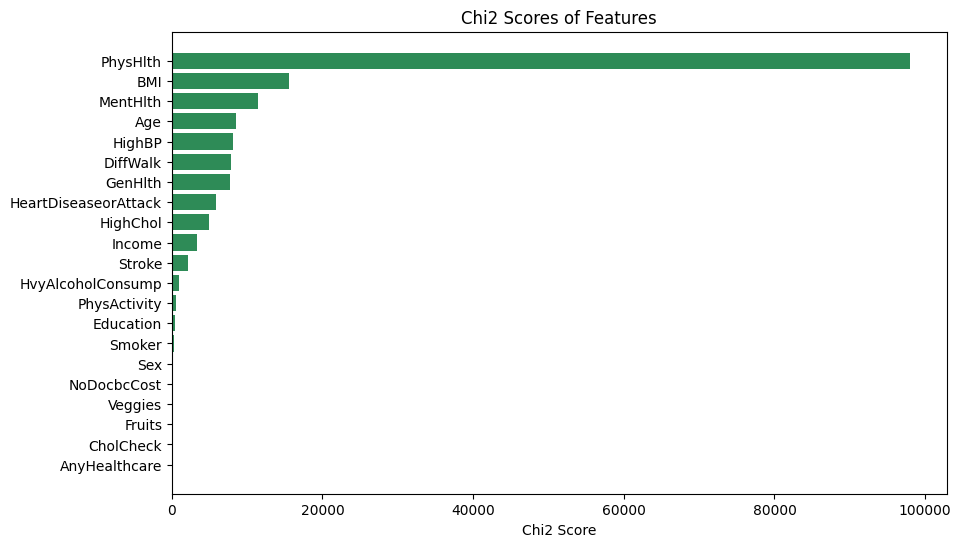

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(chi2_results['Feature'], chi2_results['Chi2 Score'], color= "seagreen")
plt.xlabel('Chi2 Score')
plt.title('Chi2 Scores of Features')
plt.gca().invert_yaxis()  
plt.show()

In [22]:
# droping irrelevant columns
df = data.copy()
cols_del = ["Sex", "Smoker", "Fruits", "Veggies", "NoDocbcCost", "AnyHealthcare", "CholCheck", "Education"]
df = df.drop(cols_del, axis=1)

In [23]:
X = df.drop("Diabetes_binary",axis=1)
Y = df["Diabetes_binary"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
print("Scaling Completed!")

Scaling Completed!


<a id="1"></a>
# <p style="background-color:#5c7a9c;font-family:newtimeroman;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Modeling</p>

### Models:
1. Logistic Regression
2. XGBoost
3. KNN

### Logistic Regression

In [26]:
lr_model = LogisticRegression(random_state=42)

#cross-validated predictions
y_pred_lr = cross_val_predict(lr_model, X_train_scaled, y_train_resampled, cv=5)

#confusion matrix
cm_lr = confusion_matrix(y_train_resampled, y_pred_lr)

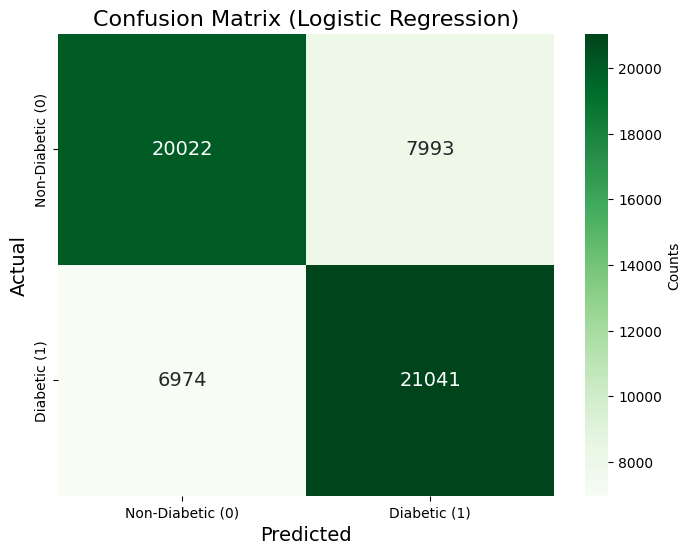

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap= "Greens", 
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            cbar=True, 
            annot_kws={'size': 14}, 
            cbar_kws={'label': 'Counts'})

plt.title('Confusion Matrix (Logistic Regression)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [28]:
accuracy = accuracy_score(y_train_resampled, y_pred_lr)
precision = precision_score(y_train_resampled, y_pred_lr)
recall = recall_score(y_train_resampled, y_pred_lr)
f1 = f1_score(y_train_resampled, y_pred_lr)

print(f"Accuracy is: {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall is: {recall:.4f}")
print(f"F1 Score is: {f1:.4f}")

Accuracy is: 0.7329
Precision is: 0.7247
Recall is: 0.7511
F1 Score is: 0.7376


### XGBoost

In [29]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

y_pred_xgb = cross_val_predict(xgb_model, X_train_scaled, y_train_resampled, cv=5)

cm_xgb = confusion_matrix(y_train_resampled, y_pred_xgb)

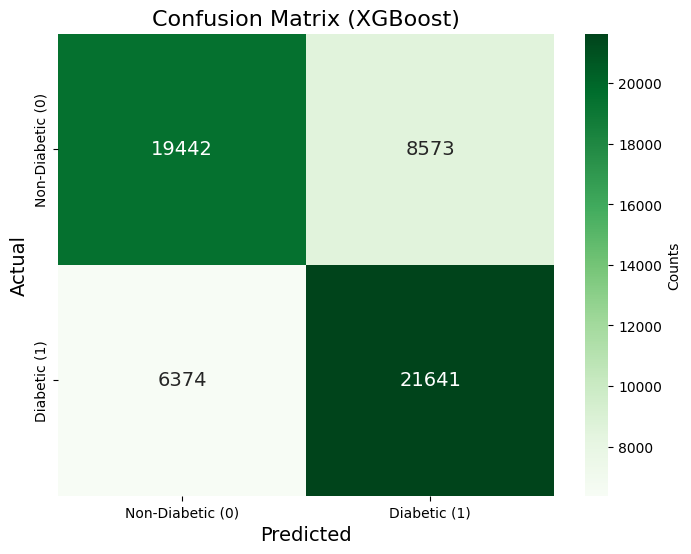

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            cbar=True, 
            annot_kws={'size': 14}, 
            cbar_kws={'label': 'Counts'})

plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [31]:
accuracy = accuracy_score(y_train_resampled, y_pred_xgb)
precision = precision_score(y_train_resampled, y_pred_xgb)
recall = recall_score(y_train_resampled, y_pred_xgb)
f1 = f1_score(y_train_resampled, y_pred_xgb)

print(f"Accuracy is: {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall is: {recall:.4f}")
print(f"F1 Score is: {f1:.4f}")

Accuracy is: 0.7332
Precision is: 0.7163
Recall is: 0.7725
F1 Score is: 0.7433


### KNN

In [32]:
knn_model = KNeighborsClassifier()

y_pred_knn = cross_val_predict(knn_model, X_train_scaled, y_train_resampled, cv=5)

cm_knn = confusion_matrix(y_train_resampled, y_pred_knn)

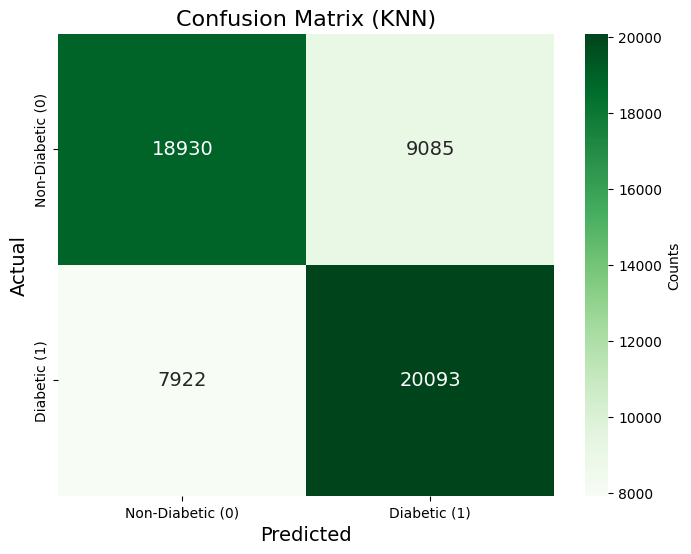

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            cbar=True, 
            annot_kws={'size': 14}, 
            cbar_kws={'label': 'Counts'})

plt.title('Confusion Matrix (KNN)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [34]:
accuracy = accuracy_score(y_train_resampled, y_pred_knn)
precision = precision_score(y_train_resampled, y_pred_knn)
recall = recall_score(y_train_resampled, y_pred_knn)
f1 = f1_score(y_train_resampled, y_pred_knn)

print(f"Accuracy is: {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall is: {recall:.4f}")
print(f"F1 Score is: {f1:.4f}")

Accuracy is: 0.6965
Precision is: 0.6886
Recall is: 0.7172
F1 Score is: 0.7026


<a id="1"></a>
# <p style="background-color:#9e7a9e;font-family:newtimeroman;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">THANK YOU!</p>